In [1]:
import pandas as pd

In [278]:
d1=pd.read_csv('full.csv')

In [253]:
d2=pd.read_csv('hits_not_factored.csv')

In [256]:
l1=list(d2['category 2'])
l2=list(d2['category 3'])

In [257]:
for x in range(len(l1)):
    if l1[x]=='Shop by Brand':
        l1[x]=l2[x]

In [258]:
d2['category 2']=l1

In [259]:
d2=d2.drop(columns=['Unnamed: 0','category 1','category 4'])

In [260]:
d1['visitor id']=d1['fullVisitorId']

In [261]:
d1=d1.drop(columns=['Unnamed: 0','fullVisitorId'])

In [262]:
final = pd.merge(d2,d1,on='visitor id',how='left')

In [263]:
hits=final.copy()

In [264]:
hits.head()

,visitor id,product id,price,category 2,category 3,product name one,product name two,channelGrouping,date,geoNetwork.country,geoNetwork.continent,totals.hits,totals.pageviews,trafficSource.source
0,3461808543879602873,GGOEGXXX0903,21.99,Apparel,Women's,Google,Tee White,Organic Search,5.0,United States,Americas,4.0,3.0,google
1,4605774125139978152,GGOEGDHJ087399,149.99,Bags,Bags,Google,Rolltop Backpack Blue,Organic Search,5.0,Russia,Europe,5.0,3.0,google
2,4605774125139978152,GGOEGBJK099999,12.99,Bags,Bags,Google,Large Tote Canvas,Organic Search,5.0,Russia,Europe,5.0,3.0,google
3,4605774125139978152,GGOEGBRJ037399,79.99,Bags,Bags,Google,Rucksack,Organic Search,5.0,Russia,Europe,5.0,3.0,google
4,4605774125139978152,GGOEABJK099899,9.99,Bags,Bags,Android,Small Tote Canvas,Organic Search,5.0,Russia,Europe,5.0,3.0,google


In [26]:
hits=hits.drop(columns=['visitor id','product id','totals.hits','totals.pageviews','trafficSource.source'])

In [29]:
pd.factorize(hits['category 2'])

(array([0, 1, 1, ..., 0, 4, 4], dtype=int64),
 Index(['Apparel', 'Bags', 'Drinkware', 'Accessories', 'YouTube', 'Google',
        'Office', 'Shop by Brand', 'Android', 'Lifestyle', 'Electronics',
        'Waze', 'Google Cloud Certified'],
       dtype='object'))

In [30]:
pd.factorize(hits['category 3'])

(array([0, 1, 1, ..., 8, 5, 5], dtype=int64),
 Index(['Women's', 'Bags', 'Drinkware', 'Accessories', 'Backpacks', 'YouTube',
        'Stickers', 'Headgear', 'Men's', 'Water Bottles and Tumblers',
        'Apparel', 'Kid's', 'Google', 'Notebooks & Journals', 'Office',
        'Shop by Brand', 'Android', 'Lifestyle', 'Electronics', 'Fun', 'Waze',
        'Writing Instruments', 'Shopping and Totes', 'Google Cloud Certified',
        'Mugs and Cups', 'Stickers & Decals', 'Miscellaneous',
        'Electronic Accessories', 'Mugs & Tumblers', 'Socks', 'Water Bottles',
        'Housewares', 'More Bags', 'Flashlights'],
       dtype='object'))

In [31]:
pd.factorize(hits['product name one'])

(array([0, 0, 0, ..., 0, 2, 2], dtype=int64),
 Index(['Google', 'Android', 'YouTube', 'other', 'Cloud', 'Professional'], dtype='object'))

In [32]:
pd.factorize(hits['channelGrouping'])

(array([0, 0, 0, ..., 0, 4, 4], dtype=int64),
 Index(['Organic Search', 'Direct', 'Paid Search', 'Referral', 'Social',
        'Affiliates', 'Display'],
       dtype='object'))

In [33]:
pd.factorize(hits['date'])

(array([0, 0, 0, ..., 2, 2, 2], dtype=int64),
 Float64Index([5.0, 9.0, 6.0, 8.0, 10.0, 7.0], dtype='float64'))

In [34]:
pd.factorize(hits['geoNetwork.country'])

(array([ 0,  1,  1, ..., 14, 23, 23], dtype=int64),
 Index(['United States', 'Russia', 'United Kingdom', 'India', 'Argentina',
        'Singapore', 'Italy', 'Germany', 'Australia', 'Panama',
        ...
        'Namibia', 'Senegal', 'Malta', 'Liechtenstein', 'Bahamas', 'Bahrain',
        'Togo', 'Fiji', 'Norfolk Island', 'Guyana'],
       dtype='object', length=167))

In [35]:
pd.factorize(hits['geoNetwork.continent'])

(array([0, 1, 1, ..., 0, 0, 0], dtype=int64),
 Index(['Americas', 'Europe', 'Asia', 'Oceania', 'Africa'], dtype='object'))

In [43]:
hits['category 3']=pd.factorize(hits['category 3'])[0]

In [38]:
hits['geoNetwork.country']=pd.factorize(hits['geoNetwork.country'])[0]

In [39]:
hits['date']=pd.factorize(hits['date'])[0]

In [40]:
hits['channelGrouping']=pd.factorize(hits['channelGrouping'])[0]

In [41]:
hits['product name one']=pd.factorize(hits['product name one'])[0]

In [254]:
len(final),len(hits),len(d2)

(325396, 325396, 224582)

In [219]:
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})

In [47]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hits)
    Sum_of_squared_distances.append(km.inertia_)
    

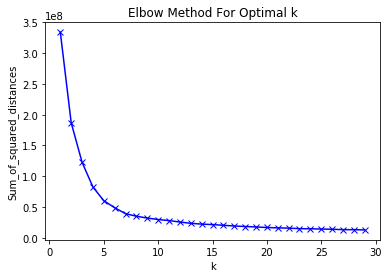

In [48]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [49]:
km = KMeans(n_clusters=7)
model= km.fit(hits)

In [267]:
final['clusters']=model.labels_

In [277]:
hits

,visitor id,product id,price,category 2,category 3,product name one,product name two,channelGrouping,date,geoNetwork.country,geoNetwork.continent,totals.hits,totals.pageviews,trafficSource.source,clusters
0,3461808543879602873,GGOEGXXX0903,21.99,Apparel,Women's,Google,Tee White,Organic Search,5.0,United States,Americas,4.0,3.0,google,4
1,4605774125139978152,GGOEGDHJ087399,149.99,Bags,Bags,Google,Rolltop Backpack Blue,Organic Search,5.0,Russia,Europe,5.0,3.0,google,2
2,4605774125139978152,GGOEGBJK099999,12.99,Bags,Bags,Google,Large Tote Canvas,Organic Search,5.0,Russia,Europe,5.0,3.0,google,0
3,4605774125139978152,GGOEGBRJ037399,79.99,Bags,Bags,Google,Rucksack,Organic Search,5.0,Russia,Europe,5.0,3.0,google,3
4,4605774125139978152,GGOEABJK099899,9.99,Bags,Bags,Android,Small Tote Canvas,Organic Search,5.0,Russia,Europe,5.0,3.0,google,0
5,4605774125139978152,GGOEGBJB099799,19.99,Bags,Bags,Google,Packable Bag Black,Organic Search,5.0,Russia,Europe,5.0,3.0,google,4
6,4605774125139978152,GGOEGBJC100199,5.99,Bags,Bags,Google,Mesh Bag Blue,Organic Search,5.0,Russia,Europe,5.0,3.0,google,0
7,4605774125139978152,GGOEGBJR100099,5.99,Bags,Bags,Google,Mesh Bag Red,Organic Search,5.0,Russia,Europe,5.0,3.0,google,0
8,2400060996995525389,GGOEGDHJ087399,149.99,Bags,Bags,Google,Rolltop Backpack Blue,Organic Search,5.0,United Kingdom,Europe,5.0,3.0,google,2
9,2400060996995525389,GGOEGBRJ037399,79.99,Bags,Bags,Google,Rucksack,Organic Search,5.0,United Kingdom,Europe,5.0,3.0,google,3


In [56]:
cluster1=final[final['clusters']==0]
cluster2=final[final['clusters']==1]
cluster3=final[final['clusters']==2]
cluster4=final[final['clusters']==3]
cluster5=final[final['clusters']==4]
cluster6=final[final['clusters']==5]
cluster7=final[final['clusters']==6]
# or cluster1=pd.read_csv('cluster1.csv') and so on



# Naive Bayes for cluster prediction: accuracy=96.91% on the test data

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(hits, final['clusters'], test_size=0.20)  

In [183]:
from sklearn.naive_bayes import GaussianNB

# create naive bayes classifier
gaunb = GaussianNB()

In [184]:
gaunb = gaunb.fit(X_train, y_train)

# predict using classifier
prediction = gaunb.predict(X_test)
print(prediction)

[6 4 4 ... 1 0 0]


In [186]:
x=prediction==y_test

In [187]:
l1=list()
for i in x:
    if i==True:
        l1.append(1)
    else:
        l1.append(0)

In [188]:
sum(l1)/len(l1)

0.9691149354640443

In [ ]:
cluster1.to_csv('cluster1.csv')
cluster2.to_csv('cluster2.csv')
cluster3.to_csv('cluster3.csv')
cluster4.to_csv('cluster4.csv')
cluster5.to_csv('cluster5.csv')
cluster6.to_csv('cluster6.csv')
cluster7.to_csv('cluster7.csv')